In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from dissociation import read_data, energies_in_eV, make_subplot, make_subplot_individual 

In [2]:
path = '../../../../../KU/Bachelor+Research/Data/Calculations/dissociation/'

data = read_data(path)

data_eV = energies_in_eV(data)

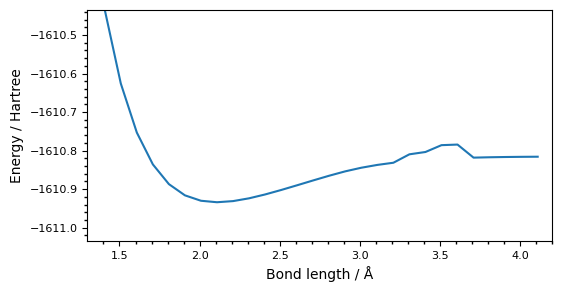

In [3]:
plt.figure(figsize=(6,3))

ax = sns.lineplot(x = data['energy_-1to+2']['MnCl+ bl'], y = data['energy_-1to+2']['MnCl+ gse'])
ax.set_ylim(data['energy_-1to+2']['MnCl+ gse'][10]-0.1, data['energy_-1to+2']['MnCl+ gse'][3])
ax.set_xlim(1.3, 4.2)
ax.set_xlabel('Bond length / Å')
ax.set_ylabel('Energy / Hartree')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

plt.show()

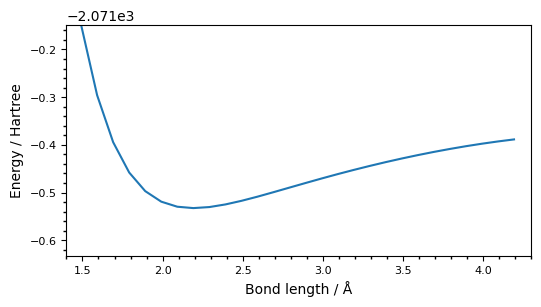

In [4]:
plt.figure(figsize=(6,3))

ax = sns.lineplot(x = data['energy_-1to+2']['MnCl2 bl'], y = data['energy_-1to+2']['MnCl2 gse'])
ax.set_ylim(data['energy_-1to+2']['MnCl2 gse'][10]-0.1, data['energy_-1to+2']['MnCl2 gse'][3])
ax.set_xlim(1.4, 4.3)
ax.set_xlabel('Bond length / Å')
ax.set_ylabel('Energy / Hartree')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

plt.show()

In [5]:
labels_list = ['Ground state', 'Excited state']
Species_list = [r'MnCl$^{+}$', r'MnCl$_{2}$', r'MnCl$_{3}^{-}$', r'MnCl(H$_{2}$O)$_{5}^{+}$', r'MnCl$_{2}$(H$_{2}$O)$_{4}$']
bond_length_eq = [2.10823, 2.19158, 2.30779, 2.32156, 2.40765]
gse_at_bleq = [-1610.934061, -2071.5326554, -2531.91603661, -1993.34412001, -2377.36866735]
gse_at_bleq = np.array(gse_at_bleq)*0.0367502

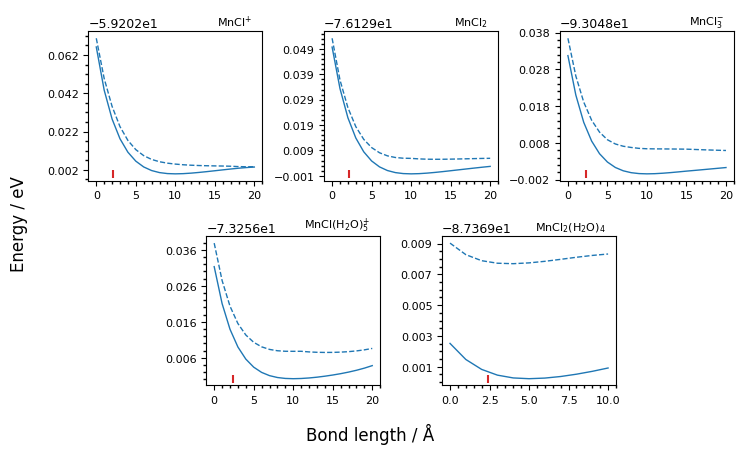

In [6]:
fig = plt.figure(figsize = (7.5, 4.5))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax5 = fig.add_subplot(spec[1,3:5])

make_subplot(ax1, data_eV['energy_MnCl+_treated'], (-3,-3), Species_list[0], (1,0.95))
ax1.scatter(bond_length_eq[0], gse_at_bleq[0], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
ax1.set_ylabel(' ', fontsize = 5)
make_subplot(ax2, data_eV['energy_MnCl2_treated'], (-3,-3), Species_list[1], (1,0.95))
ax2.scatter(bond_length_eq[1], gse_at_bleq[1], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
make_subplot(ax3, data_eV['energy_MnCl3-_treated'], (-3,-3), Species_list[2], (1,0.95))
ax3.scatter(bond_length_eq[2], gse_at_bleq[2], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
make_subplot(ax4, data_eV['energy_MnClH2O_treated'], (-3,-3), Species_list[3], (1,0.95))
ax4.scatter(bond_length_eq[3], gse_at_bleq[3], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')
make_subplot(ax5, data_eV['energy_MnCl2aq_treated'], (-3,-3), Species_list[4], (1,0.95))
ax5.scatter(bond_length_eq[4], gse_at_bleq[4], marker = '|', color = 'tab:red', zorder = 10, label = 'Eq bond length')

fig.supxlabel('Bond length / Å')
fig.supylabel('Energy / eV')

plt.tight_layout(pad=0.8)
plt.savefig('dissociation.png', dpi=150)
plt.show()

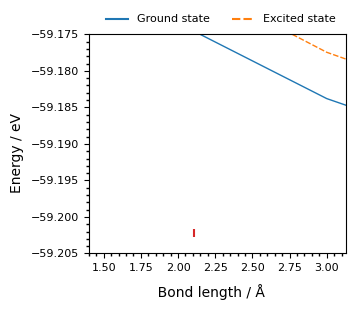

In [7]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, data_eV['energy_MnCl+_treated'], bond_length_eq, gse_at_bleq, labels_list, 0, (1,1))
axes.set_xlim(1.4, 3.13)
axes.set_ylim(-59.205, -59.175)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl+.png', dpi=150)
plt.show()

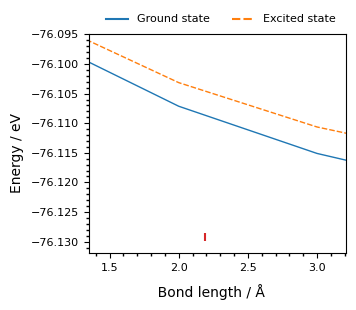

In [8]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, data_eV['energy_MnCl2_treated'], bond_length_eq, gse_at_bleq, labels_list, 1, (1,1))
axes.set_xlim(1.35, 3.21)
axes.set_ylim(-76.132, -76.095)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl2.png', dpi=150)
plt.show()

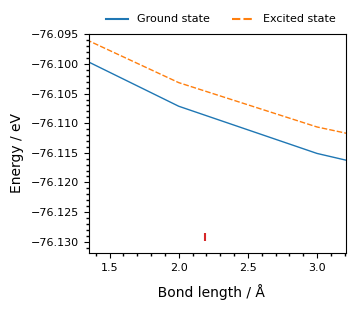

In [9]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, data_eV['energy_MnCl2_v2'], bond_length_eq, gse_at_bleq, labels_list, 1, (1,1))
axes.set_xlim(1.35, 3.21)
axes.set_ylim(-76.132, -76.095)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl2_v2.png', dpi=150)
plt.show()

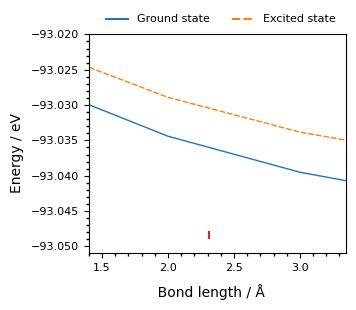

In [10]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, data_eV['energy_MnCl3-_treated'], bond_length_eq, gse_at_bleq, labels_list, 2, (1,1))
axes.set_xlim(1.4, 3.35)
axes.set_ylim(-93.051, -93.02)

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl3-.png', dpi=150)
plt.show()

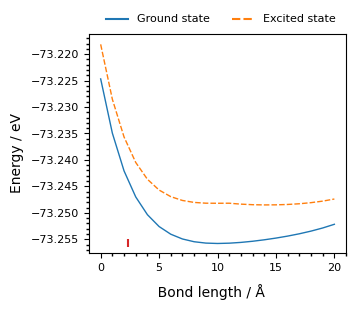

In [11]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, data_eV['energy_MnClH2O_treated'], bond_length_eq, gse_at_bleq, labels_list, 3, (1,1))

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnClH2O.png', dpi=150)
plt.show()

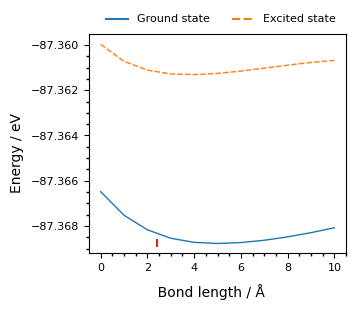

In [12]:
fig, axes = plt.subplots(1,1, figsize=(3.5,3))

make_subplot_individual(axes, data_eV['energy_MnCl2aq_treated'], bond_length_eq, gse_at_bleq, labels_list, 4, (1,1))

fig.supxlabel('               Bond length / Å', fontsize = 10)
fig.supylabel('Energy / eV', fontsize = 10)

plt.tight_layout(pad=0.5)
plt.savefig('dissociation_MnCl2aq.png', dpi=150)
plt.show()